In [161]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import os, pickle, sys, random
import seaborn as sns
from sklearn.manifold import TSNE
from scipy.stats import norm
sns.set(style="whitegrid", palette="rainbow")

https://github.com/YosefLab/scVI

https://nbviewer.jupyter.org/github/YosefLab/scVI/blob/master/tests/notebooks/data_loading.ipynb

In [2]:
from scvi.dataset import LoomDataset, CsvDataset, Dataset10X, DownloadableAnnDataset
from scvi.dataset import BrainLargeDataset, CortexDataset, PbmcDataset, RetinaDataset, HematoDataset, CbmcDataset, BrainSmallDataset, SmfishDataset
save_path = "data/"

# smFISH
http://linnarssonlab.org/osmFISH/
## Load Data

In [3]:
smfish_dataset = SmfishDataset(save_path=save_path)

[2020-01-10 21:44:40,390] INFO - scvi.dataset.dataset | File /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/osmFISH_SScortex_mouse_all_cell.loom already downloaded
[2020-01-10 21:44:40,392] INFO - scvi.dataset.smfish | Loading smFISH dataset
[2020-01-10 21:44:40,482] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2020-01-10 21:44:40,489] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-01-10 21:44:40,491] INFO - scvi.dataset.dataset | Downsampled from 6471 to 4530 cells
[2020-01-10 21:44:40,495] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-10 21:44:40,498] INFO - scvi.dataset.dataset | Remapping labels to [0,N]


In [ ]:
smfish_dataset

In [91]:
set(smfish_dataset.labels.flatten())

{0, 1, 2, 3, 4, 5}

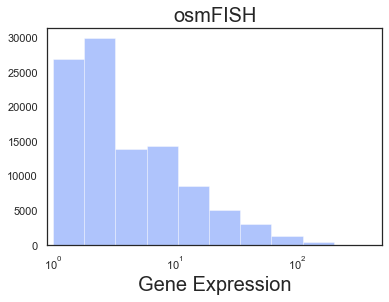

In [166]:
sns.set(style="white", palette="rainbow")
sns.distplot(smfish_dataset.X.flatten(), kde=False, label="osmFISH", bins=np.logspace(0,np.log(10),10))
plt.title("osmFISH", fontsize=20)
plt.xlabel("Gene Expression", fontsize=20)
plt.ylabel("")
plt.xscale("log")
plt.xlim(0.9, 500)
plt.savefig("figure/dist/osmFISH.pdf", bbox_inches='tight')

In [ ]:
sorted(smfish_dataset.X.flatten())[:10]

In [ ]:
np.mean(smfish_dataset.X.flatten()), np.std(smfish_dataset.X.flatten())

In [ ]:
?sns.distplot

## Normalize

In [ ]:
norm_X = (smfish_dataset.X - np.mean(smfish_dataset.X, axis=0))/np.std(smfish_dataset.X, axis=0)

In [ ]:
np.std(norm_X, axis=0)

In [ ]:
np.cov(norm_X[:, 0], norm_X[:, 1])

In [ ]:
np.cov(norm_X.T)/np.cov(smfish_dataset.X.T)

In [ ]:
np.cov(norm_X.T)

In [ ]:
np.cov(smfish_dataset.X.T)

# Cortex

In [99]:
cortex_dataset = CortexDataset(save_path=save_path, total_genes=558) 

[2020-01-10 23:07:18,196] INFO - scvi.dataset.dataset | File /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/expression.bin already downloaded
[2020-01-10 23:07:18,198] INFO - scvi.dataset.cortex | Loading Cortex data
[2020-01-10 23:07:28,126] INFO - scvi.dataset.cortex | Finished preprocessing Cortex data
[2020-01-10 23:07:28,144] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-10 23:07:28,146] INFO - scvi.dataset.dataset | Remapping labels to [0,N]


In [ ]:
cortex_dataset

In [ ]:
set(list(cortex_dataset.labels.flatten().astype(str)))

In [ ]:
X_tsne2 = TSNE(n_components=2).fit_transform(cortex_dataset.X)

In [ ]:
colormap = dict(zip(range(7), sns.color_palette("Paired", 7)))
tmp_df = pd.DataFrame(data={"X":list(X_tsne2[:, 0]), "Y":list(X_tsne2[:, 1]), "Type":[colormap[x] for x in cortex_dataset.labels.flatten()]})
sns.scatterplot(x="X", y="Y", hue="Type", data=tmp_df, sizes=(10, 200))
plt.title("Cortex (3005 cells, 55g genes, 7 types)")
plt.legend(list(range(7)))
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.legend().remove()
plt.axis("off")
plt.savefig("figure/scatter/Cortex.pdf", bbox_inches='tight')

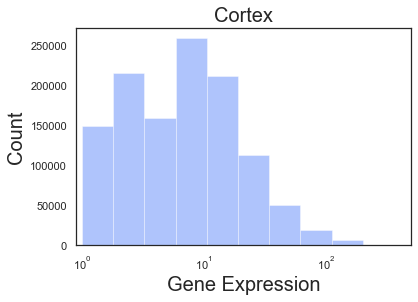

In [165]:
sns.distplot(cortex_dataset.X.flatten(), kde=False, label="Cortex", bins=np.logspace(0,np.log(10),10))
plt.title("Cortex", fontsize=20)
plt.xlabel("Gene Expression", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xscale("log")
plt.xlim(0.9, 500)
plt.savefig("figure/dist/cortex.pdf", bbox_inches='tight')

# PBMC

In [109]:
pbmc_dataset = PbmcDataset(save_path=save_path, save_path_10X=os.path.join(save_path, "10X"))

[2020-01-10 23:14:06,200] INFO - scvi.dataset.dataset | File /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/gene_info_pbmc.csv already downloaded
[2020-01-10 23:14:06,202] INFO - scvi.dataset.dataset | File /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/pbmc_metadata.pickle already downloaded
[2020-01-10 23:14:06,344] INFO - scvi.dataset.dataset | File /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/10X/pbmc8k/filtered_gene_bc_matrices.tar.gz already downloaded
[2020-01-10 23:14:06,345] INFO - scvi.dataset.dataset10X | Preprocessing dataset
[2020-01-10 23:14:28,799] INFO - scvi.dataset.dataset10X | Finished preprocessing dataset
[2020-01-10 23:14:28,945] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-10 23:14:28,947] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-01-10 23:14:28,989] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-01-10 23:14:29,096] INFO - scvi.dataset.datas

In [ ]:
pbmc_dataset

In [115]:
pbmc_dataset.X

<11990x3346 sparse matrix of type '<class 'numpy.int64'>'
	with 5489147 stored elements in Compressed Sparse Row format>

In [114]:
set(list(pbmc_dataset.labels.flatten().astype(str)))

{'0', '1', '2', '3', '4', '5', '6', '7', '8'}

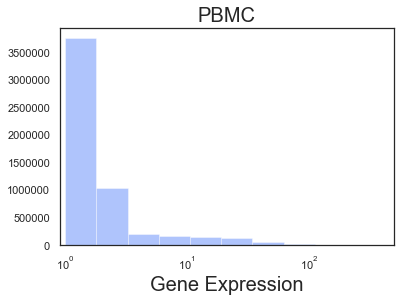

In [167]:
sns.distplot(pbmc_dataset.X.todense().flatten(),kde=False, label="PBMC", bins=np.logspace(0,np.log(10),10))
plt.title("PBMC", fontsize=20)
plt.xlabel("Gene Expression", fontsize=20)
plt.ylabel("")
plt.xscale("log")
plt.xlim(0.9, 500)
plt.savefig("figure/dist/pbmc.pdf", bbox_inches='tight')

# HEMATO

In [134]:
hemato_dataset = HematoDataset(save_path=os.path.join(save_path, 'HEMATO/')) 

[2020-01-10 23:22:19,780] INFO - scvi.dataset.dataset | File /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/HEMATO/bBM.raw_umifm_counts.csv.gz already downloaded
[2020-01-10 23:22:19,786] INFO - scvi.dataset.dataset | File /Users/sherilynw/Desktop/4_1/计算生物学/singlecell_casuality/data/HEMATO/data.zip already downloaded
[2020-01-10 23:22:19,788] INFO - scvi.dataset.hemato | Preprocessing Hemato data
[2020-01-10 23:23:52,190] INFO - scvi.dataset.hemato | Finished preprocessing Hemato data
[2020-01-10 23:23:52,697] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-10 23:23:52,698] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-01-10 23:23:52,756] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-01-10 23:23:52,806] INFO - scvi.dataset.dataset | Downsampled from 4016 to 4016 cells


In [ ]:
hemato_dataset

In [ ]:
sorted(set(hemato_dataset.labels.flatten()))

In [ ]:
X_tsne_hemato = TSNE(n_components=2).fit_transform(hemato_dataset.X)

In [ ]:
colormap = dict(zip(range(101), sns.color_palette("rainbow", 101)))
tmp_df = pd.DataFrame(data={"X":list(X_tsne_hemato[:, 0]), "Y":list(X_tsne_hemato[:, 1]), "Type":[colormap[x] for x in hemato_dataset.labels.flatten()]})
sns.scatterplot(x="X", y="Y", hue="Type", data=tmp_df, sizes=(10, 200))
plt.title("Hemato (4016 cells, 7397 genes, 101 types)")
plt.legend(list(range(101))).remove()
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.legend().remove()
plt.axis("off")
plt.savefig("figure/scatter/Hemato.pdf", bbox_inches='tight')

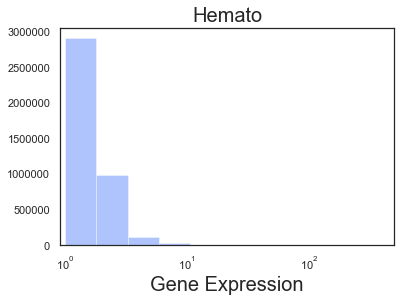

In [169]:
sns.distplot(hemato_dataset.X.flatten(), kde=False, label="Hemato", bins=np.logspace(0,np.log(10),10))
plt.title("Hemato", fontsize=20)
plt.xlabel("Gene Expression", fontsize=20)
plt.ylabel("")
plt.xscale("log")
plt.xlim(0.9, 500)
plt.savefig("figure/dist/hemato.pdf", bbox_inches='tight')

# Playground

In [182]:
a = np.zeros(shape=[2, 3])
a[0][0] = 1
a[1][2] = -0.9
a

array([[ 1. ,  0. ,  0. ],
       [ 0. ,  0. , -0.9]])

In [174]:
a**2 - [1, 0, 9]

array([[ 0.  ,  0.  , -9.  ],
       [-1.  ,  0.  , -8.19]])

In [185]:
np.ones(a.shape)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [189]:
np.maximum(a, 0.1)

array([[1. , 0.1, 0.1],
       [0.1, 0.1, 0.1]])

In [ ]:
random.random()

In [81]:
X = smfish_dataset.X[:100, :]

In [44]:
np.cov(X, rowvar=False)

array([[ 1.11111105,  0.88851538,  0.82230671, ..., -0.39073433,
        -0.36608005,  0.34720089],
       [ 0.88851538,  1.11111102,  0.99630246, ..., -0.1036303 ,
        -0.17644731,  0.10365621],
       [ 0.82230671,  0.99630246,  1.11111116, ..., -0.17766028,
        -0.21540638,  0.03312449],
       ...,
       [-0.39073433, -0.1036303 , -0.17766028, ...,  1.11111114,
        -0.13219085, -0.45653013],
       [-0.36608005, -0.17644731, -0.21540638, ..., -0.13219085,
         1.11111104,  0.1571232 ],
       [ 0.34720089,  0.10365621,  0.03312449, ..., -0.45653013,
         0.1571232 ,  1.11111117]])

In [12]:
norm.pdf(0, loc=0, scale=1)

0.3989422804014327

In [ ]:
def sample_std(X):
    nrow, ncol = X.shape
    sample_X = np.zeros(shape=[100, ncol, ncol])
    for time in range(100):
        sample_X = [np.random.randint(nrow, size=int(0.5*nrow)), :]
        
    
    
sns.scatterplot()

In [47]:
norm.rvs(size=100, loc=0, scale=1)

array([ 8.45530183e-01, -9.54495944e-01, -3.08004084e-02, -3.34721392e+00,
        2.80246181e+00, -4.48528113e-01, -2.37006091e-01, -1.14303241e+00,
        1.29903268e-01, -8.70495310e-01, -2.46056753e-01, -2.40909325e+00,
        2.02678009e+00, -7.14875420e-01, -2.52635368e-01,  1.31313942e+00,
       -1.39520566e+00,  1.04529424e-03, -9.57537700e-02, -1.17632271e-02,
        1.14555304e+00,  2.31822525e+00, -1.18722134e+00,  4.14713646e-02,
        1.29518212e+00,  5.35546107e-01,  6.35724171e-01,  1.78612809e+00,
       -1.76175619e+00, -2.54585359e+00, -1.27417901e+00,  2.13133533e+00,
        5.82745974e-01,  3.76940506e-01,  1.00764625e+00,  9.39963141e-01,
        1.16990076e+00,  1.15462360e+00, -3.75695769e-01,  2.56462689e-01,
       -1.80494893e+00,  1.06471676e+00, -1.39168340e+00, -1.10806202e+00,
       -2.28958721e-01,  1.02737771e+00,  7.07626924e-01, -3.91441019e-01,
        3.73832435e-01, -3.77451491e-01, -7.24838593e-01,  1.70851710e+00,
        5.91787242e-01, -

In [54]:
sample[np.random.randint(num)]

0.3886387373871096

In [56]:
np.std(sample[np.random.randint(num)], ddof=1)

TypeError: randint() takes at least 1 positional argument (0 given)

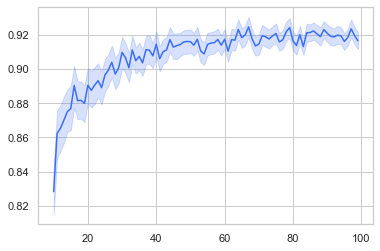

In [66]:
x = []
y = []
sample = norm.rvs(size=100, loc=0, scale=1)
n_sample = len(sample)
for num in range(10, 100):
    for t in range(1000):
        y.append(np.std(sample[np.random.randint(n_sample, size=num)], ddof=0))
        x.append(num)
sns.lineplot(x, y)

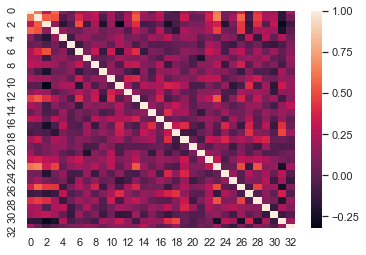

In [87]:
sns.heatmap(np.corrcoef(np.log(X+1), rowvar=False))

In [83]:
np.log(X+1)

array([[3.583519 , 3.7376697, 0.       , ..., 0.       , 1.609438 ,
        1.3862944],
       [2.8332133, 3.295837 , 0.6931472, ..., 0.       , 3.0910425,
        1.3862944],
       [4.564348 , 3.912023 , 1.7917595, ..., 0.       , 1.609438 ,
        0.6931472],
       ...,
       [3.7841897, 3.4965076, 0.       , ..., 1.0986123, 1.7917595,
        1.7917595],
       [3.7612002, 2.8332133, 1.0986123, ..., 0.       , 0.       ,
        1.0986123],
       [0.       , 2.7725887, 1.3862944, ..., 0.       , 1.0986123,
        0.       ]], dtype=float32)

In [84]:
X

array([[35., 41.,  0., ...,  0.,  4.,  3.],
       [16., 26.,  1., ...,  0., 21.,  3.],
       [95., 49.,  5., ...,  0.,  4.,  1.],
       ...,
       [43., 32.,  0., ...,  2.,  5.,  5.],
       [42., 16.,  2., ...,  0.,  0.,  2.],
       [ 0., 15.,  3., ...,  0.,  2.,  0.]], dtype=float32)

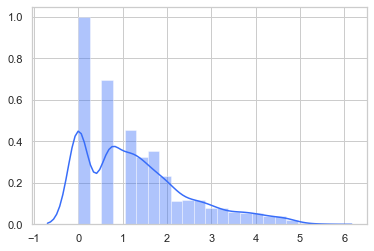

In [90]:
sns.distplot(np.log(X+1).flatten())

In [192]:
g = nx.Graph()
g.add_edge(1, 3, weight=9)
g.add_edge(1, 3, weight=9)
g.add_edge(1, 3, weight=4)
g.add_edge(3, 1, weight=4)
nx.number_of_edges(g), g.edges[1, 3]

(1, {'weight': 4})

In [193]:
nx.number_of_edges(g)

1